### Project Proposal: 

## Classification of Attributes to Best Predict Heart Disease 

#### Introduction

I. According to Statistics Canada, heart disease is the second leading cause of death in 2019, accounting for 18.5% of all deaths. Therefore by using the Heart Disease data set, we will determine the three attributes (i.e. characteristics or factors) that can best predict the presence of heart disease in a person. 

The project is build upon the identification of heart disease and the attributes of patients who have or do not have presence of heart disease identified. From pre-existing research, the most common factors of heart diseases are known to be correlated with high blood pressure, high cholesterol, smoking. Men are also known to be at higher risk of heart disease. 

II. The question we will attempt to answer with this project is: Which three attribute can best predict the presence of heart diesease in patients?

III. The dataset used for this project is the 'Heart Disease Data Set' provided by the UCL Machine Learning Repository. The database contains 76 attributes, but we will only categorize a subset of six of them, of which is already known to be common indication of heart disease as previously mentioned. Additionally, only the Cleveland sub database will be used, as it is the only one only by ML researchers to this date. (Or try Hungary/Switzerland?).

#### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(data.table)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:

heart_disease_data <- read_csv("processed.cleveland.data")
names(heart_disease_data) <- c("age", "sex", "chest_pain_type", "resting_bp", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "presence_of_h_d")

male <- heart_disease_data  %>%
filter(sex == 1) %>%
mutate(sex = "Male")

female <- heart_disease_data %>%
filter(sex == 0) %>%
mutate(sex = "Female")

heart_disease_data <- rbind(male, female)
heart_disease_data <- heart_disease_data %>%
select(-chest_pain_type, -fasting_blood_sugar, -resting_electrocardiographic_results, -exercise_induced_angina, -oldpeak, -slope, -thal, -ca)

heart_disease_data_0 <-heart_disease_data %>%
filter(presence_of_h_d == 0)

heart_disease_data_1 <-heart_disease_data %>%
filter(presence_of_h_d > 0) %>%
mutate(presence_of_h_d = 1)

heart_disease_data<-rbind(heart_disease_data_0, heart_disease_data_1) %>% 
mutate(presence_of_h_d = as_factor(presence_of_h_d))

# heart_disease_data
heart_split <- initial_split(heart_disease_data, prop = 0.66, strata = sex) 
training_data <- training(heart_split) 
training_data


# training_data
#summ <- colMeans(training_data %>% select(-sex, -presence_of_h_d))
#summ
data_mean <- 
    modify(training_data, mean) %>% head(1)
data_mean



Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



age,sex,resting_bp,chol,maximum_heart_rate_achieved,presence_of_h_d
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
56,Male,120,236,178,0
57,Male,140,192,148,0
54,Male,140,239,160,0
⋮,⋮,⋮,⋮,⋮,⋮
55,Female,128,205,130,1
57,Female,140,241,123,1
57,Female,130,236,174,1


Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


age,sex,resting_bp,chol,maximum_heart_rate_achieved,presence_of_h_d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.43284,NA,132.0597,245.5821,148.8657,NA


Note:
There is no missing data in the training data set.

#### Visualization example

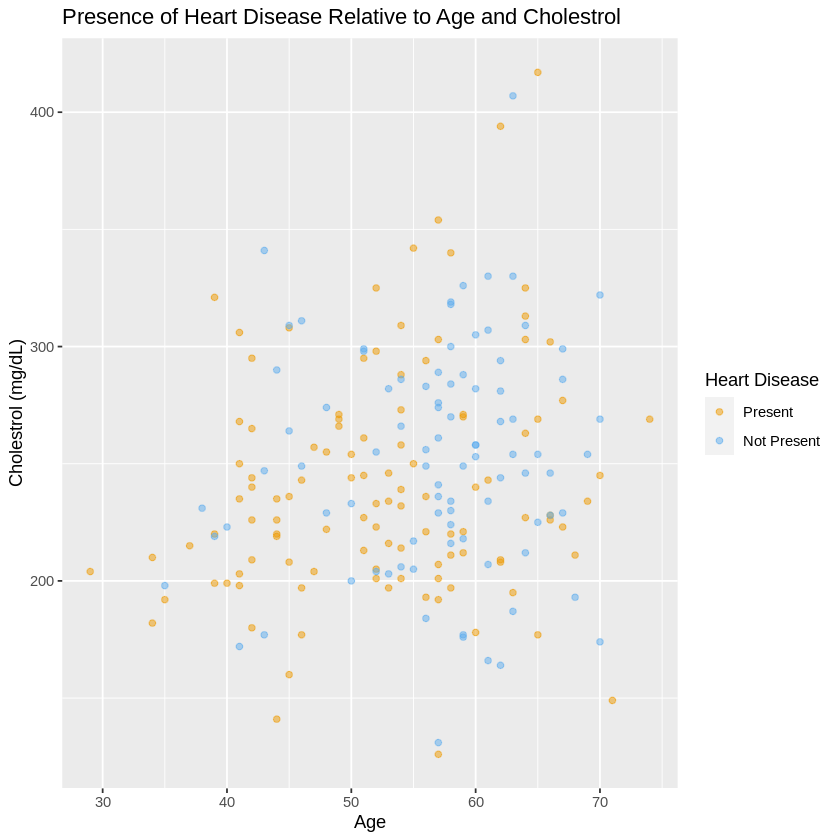

In [3]:
my_plot<- training_data %>%
       ggplot(aes(x = age, y = chol, color = presence_of_h_d)) +
       geom_point(alpha = 0.5)+
        scale_color_manual(labels = c("Present", "Not Present"), 
                     values = c("orange2", "steelblue2")) + 
       labs(x = "Age", y = "Cholestrol (mg/dL)", color = "Heart Disease") +
       ggtitle("Presence of Heart Disease Relative to Age and Cholestrol")

my_plot

#### Methods

I. We will conduct our data analysis by using the k-nearest neighbors model.

II. The variables and columns we will use are the data and columns we use are picked based on the attributes. The attributes that will not be used are removed. Although we would like to test the smoking as a factor, we did not include it because it was not provided in the data set.

II. We will visualize our results in the form of a scatterplot. 

#### Expected Outcomes and Significance

I We expect to find that heart disease has a high correlation with the attributes of cholesterol levels, age and the maximum heart rate achieved.

II. The impacts of these findings would contribute to developing the current knowledge of factors of heart disease. Identifying the most influential components may help people decrease their odds of heart disease upon knowing which things are at play. Additionally, for factors that are controllable, people will be more conscious of their health and hopefully be inspired to change poor daily habits that could lead to heart disease.

III. In the future this could lead to questions such as: How do the classification of having heart disease differ depending on the population in different countries? Amongst other factors such as ethnicity. 